In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("DataGT.csv")
df

,Year,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,1995,-1.0,-1.0,-1.0,-1.00,60.800000,39.029553,88.900000,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.4,38.6,37.4,1400.0
1,1996,-1.0,-1.0,-1.0,-1.00,67.679939,48.340508,92.304756,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,38.1,1500.0
2,1997,-1.0,-1.0,-1.0,-1.00,68.904076,50.095980,92.530144,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,38.8,1600.0
3,1998,-1.0,-1.0,-1.0,-1.00,70.124130,51.876376,92.736572,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,39.5,1600.0
4,1999,-1.0,-1.0,-1.0,-1.00,70.900000,54.212460,91.300000,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.3,34.3,40.2,1600.0
5,2000,-1.0,40.7,17.1,66.75,73.318205,55.009254,95.397837,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,40.9,1500.0
6,2001,-1.0,39.9,16.2,65.70,73.733215,57.331640,93.246452,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,41.6,1400.0
7,2002,64.0,39.2,15.3,64.80,78.667838,64.146689,95.710971,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,42.1,1200.0
8,2003,-1.0,38.7,14.6,64.00,78.512204,63.396697,96.030896,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,42.6,1100.0
9,2004,-1.0,38.3,13.9,63.40,77.151161,62.675712,93.728249,-1.00,-1.00,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,42.4,1000.0


In [3]:
# Supongamos que 'data' es tu DataFrame y 'target' es la variable objetivo
correlations = df.corr()['Birth rate, crude (per 1,000 people)'].sort_values(ascending=False)
# Calcula las correlaciones con la variable objetivo

# Filtra las correlaciones que no son NaN
non_nan_correlations = correlations.dropna()
# Muestra las 15 correlaciones más altas
top_15_correlations = non_nan_correlations.head(16)

# Selecciona solo las columnas correspondientes a las 15 correlaciones más altas del DataFrame original
df_top_15 = df.loc[:, top_15_correlations.index]

# Muestra el DataFrame con solo las 15 columnas más correlacionadas
df_top_15

,"Birth rate, crude (per 1,000 people)","Fertility rate, total (births per woman)",Number of infant deaths,Number of under-five deaths,Number of neonatal deaths,"Population ages 00-04, male (% of male population)","Population ages 00-04, female (% of female population)",Rural population (% of total population),"Mortality rate, neonatal (per 1,000 live births)","Mortality rate, infant, female (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)","Mortality rate, infant, male (per 1,000 live births)","Mortality rate, under-5, male (per 1,000 live births)","Mortality rate, under-5 (per 1,000 live births)","Mortality rate, under-5, female (per 1,000 live births)",Population growth (annual %)
0,37.349,5.105,18794.0,24335.0,9462.0,17.130754,16.516278,56.346,24.4,43.7,49.2,54.4,69.3,64.3,59.1,2.452989
1,36.766,5.008,18334.0,23630.0,9305.0,17.004543,16.394647,56.011,23.8,42.1,47.4,52.5,66.5,61.6,56.5,2.402721
2,36.228,4.906,17854.0,22921.0,9152.0,16.862008,16.256444,55.677,23.1,40.6,45.7,50.5,63.8,59.0,54.1,2.358059
3,35.777,4.800,17415.0,22248.0,9026.0,16.701726,16.099841,55.341,22.5,39.2,44.0,48.7,61.2,56.6,51.8,2.361987
4,34.914,4.687,16904.0,21522.0,8785.0,16.516014,15.914004,55.005,21.9,37.8,42.5,46.9,58.8,54.3,49.6,2.369476
5,34.505,4.583,16419.0,20816.0,8654.0,16.315546,15.710839,54.668,21.3,36.5,41.0,45.2,56.4,52.1,47.7,2.433944
6,34.143,4.502,16049.0,20232.0,8524.0,16.123551,15.516839,54.332,20.7,35.3,39.5,43.6,54.2,50.1,45.7,2.402401
7,33.227,4.371,15558.0,19546.0,8259.0,15.914515,15.307196,53.995,20.2,34.0,38.2,42.1,52.2,48.1,43.8,2.297882
8,32.249,4.250,14930.0,18718.0,7985.0,15.661337,15.056531,53.682,19.7,32.8,36.9,40.7,50.2,46.2,42.1,2.180745
9,31.397,4.134,14336.0,17926.0,7738.0,15.379961,14.781721,53.384,19.1,31.7,35.6,39.3,48.3,44.4,40.4,2.125986


In [4]:
df.head()

,Year,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,1995,-1.0,-1.0,-1.0,-1.0,60.800000,39.029553,88.900000,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.4,38.6,37.4,1400.0
1,1996,-1.0,-1.0,-1.0,-1.0,67.679939,48.340508,92.304756,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,38.1,1500.0
2,1997,-1.0,-1.0,-1.0,-1.0,68.904076,50.095980,92.530144,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,38.8,1600.0
3,1998,-1.0,-1.0,-1.0,-1.0,70.124130,51.876376,92.736572,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,39.5,1600.0
4,1999,-1.0,-1.0,-1.0,-1.0,70.900000,54.212460,91.300000,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,9.3,34.3,40.2,1600.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 1487 entries, Year to Young people (ages 15-24) newly infected with HIV
dtypes: float64(1486), int64(1)
memory usage: 313.8 KB


In [6]:
df.describe()

,Year,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2008.000000,3.370370,33.218519,10.203704,53.485185,82.075366,71.064436,94.792836,3.102963,2.532222,...,-0.555556,-0.840741,-0.807407,-0.82963,-0.681481,-0.874074,0.070370,2.903704,40.855556,755.555556
std,7.937254,15.833626,16.889483,5.637203,26.662051,9.754628,15.861724,2.048030,12.275258,10.864346,...,2.309401,0.827535,1.000740,0.88527,1.655071,0.654330,3.143713,11.322288,1.211272,574.679398
min,1995.000000,-1.000000,-1.000000,-1.000000,-1.000000,60.800000,39.029553,88.900000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,37.400000,100.000000
25%,2001.500000,-1.000000,37.800000,11.550000,62.250000,75.442188,60.003676,93.822632,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,40.700000,200.000000
50%,2008.000000,-1.000000,39.100000,11.900000,64.000000,83.113136,72.185747,94.901924,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,41.000000,500.000000
75%,2014.500000,-1.000000,41.750000,12.600000,66.825000,89.305984,82.500051,96.243403,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,41.500000,1300.000000
max,2021.000000,64.000000,48.100000,17.100000,73.350000,97.865654,98.146020,97.609383,44.110000,42.090000,...,11.000000,3.300000,4.200000,3.60000,7.600000,2.400000,10.400000,38.600000,42.600000,1600.000000


# 3. Definimos variable objetivo y caracteristicas

In [7]:
df.columns

Index(['Year',
       'ARI treatment (% of children under 5 taken to a health provider)',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       'Access to electricity (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)',
       'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
       'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)',
       ...
       'Women who believe a husband is justified in beating his wife (any of five reasons) (%)',
       'Women who believe a husband is justified in beating his wife when she argues with him (%)',
       'Wom

In [8]:
y= df_top_15['Birth rate, crude (per 1,000 people)']
y

0     37.349
1     36.766
2     36.228
3     35.777
4     34.914
5     34.505
6     34.143
7     33.227
8     32.249
9     31.397
10    30.438
11    29.658
12    29.195
13    28.430
14    27.934
15    27.525
16    27.198
17    26.910
18    26.336
19    26.077
20    25.834
21    25.541
22    24.791
23    23.929
24    22.858
25    21.816
26    21.120
Name: Birth rate, crude (per 1,000 people), dtype: float64

In [9]:
X = df_top_15.drop(['Birth rate, crude (per 1,000 people)'],axis=1)
X

,"Fertility rate, total (births per woman)",Number of infant deaths,Number of under-five deaths,Number of neonatal deaths,"Population ages 00-04, male (% of male population)","Population ages 00-04, female (% of female population)",Rural population (% of total population),"Mortality rate, neonatal (per 1,000 live births)","Mortality rate, infant, female (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)","Mortality rate, infant, male (per 1,000 live births)","Mortality rate, under-5, male (per 1,000 live births)","Mortality rate, under-5 (per 1,000 live births)","Mortality rate, under-5, female (per 1,000 live births)",Population growth (annual %)
0,5.105,18794.0,24335.0,9462.0,17.130754,16.516278,56.346,24.4,43.7,49.2,54.4,69.3,64.3,59.1,2.452989
1,5.008,18334.0,23630.0,9305.0,17.004543,16.394647,56.011,23.8,42.1,47.4,52.5,66.5,61.6,56.5,2.402721
2,4.906,17854.0,22921.0,9152.0,16.862008,16.256444,55.677,23.1,40.6,45.7,50.5,63.8,59.0,54.1,2.358059
3,4.800,17415.0,22248.0,9026.0,16.701726,16.099841,55.341,22.5,39.2,44.0,48.7,61.2,56.6,51.8,2.361987
4,4.687,16904.0,21522.0,8785.0,16.516014,15.914004,55.005,21.9,37.8,42.5,46.9,58.8,54.3,49.6,2.369476
5,4.583,16419.0,20816.0,8654.0,16.315546,15.710839,54.668,21.3,36.5,41.0,45.2,56.4,52.1,47.7,2.433944
6,4.502,16049.0,20232.0,8524.0,16.123551,15.516839,54.332,20.7,35.3,39.5,43.6,54.2,50.1,45.7,2.402401
7,4.371,15558.0,19546.0,8259.0,15.914515,15.307196,53.995,20.2,34.0,38.2,42.1,52.2,48.1,43.8,2.297882
8,4.250,14930.0,18718.0,7985.0,15.661337,15.056531,53.682,19.7,32.8,36.9,40.7,50.2,46.2,42.1,2.180745
9,4.134,14336.0,17926.0,7738.0,15.379961,14.781721,53.384,19.1,31.7,35.6,39.3,48.3,44.4,40.4,2.125986


# 4. División de datos para test y entrenamiento.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

#Nuevamente un 70% para entrenamiento y el restantes para prueba. 
#Tambien dejamos un seed para que los resultados sean replicables.

In [11]:
#Vemos como estan distribuidos los datos.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 15), (9, 15), (18,), (9,))

### Debido a que los datos se encuentran en escalas distintas seria buena idea normalizar los datos para que estos se encuentren en la misma escala.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Seleccionamos modelo

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 6. entrenamos y ajustamos el modelo

In [14]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
#Obtenemos interceptos.

intercept = model.intercept_
intercept

29.092555555555546

In [16]:
#Obtenemos los coeficientes de las caracteristicas

coef = model.coef_
coef

array([  0.60517314,  -7.20898881,  11.86687888,   4.84945103,
         8.57711022, -10.19096449,   2.73321381,  -2.69445717,
        -3.9949787 ,  -2.82380209, -11.19029351,   9.27530866,
         0.01553325,   4.4282226 ,  -0.05902767])

In [17]:
y_pred = model.predict(X_test_scaled)
y_pred

array([25.87086863, 36.60888856, 24.71006986, 29.28064258, 21.86259922,
       36.21736844, 23.82421924, 35.65960095, 34.11789888])

# 8. Vemos la precisión del modelo.

In [18]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [19]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.07389605805919865

In [20]:
mape = mean_absolute_percentage_error(y_test,y_pred)
mape

0.002524806862320308

In [21]:
mse = mean_squared_error(y_test,y_pred)
mse

0.007511530132058741

In [22]:
rmse = np.sqrt(mse)
rmse

0.08666908406149647

In [23]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
r_squared



0.9997618076086282

In [24]:
print("MEAN ABSOLUTE ERROR (MAE): ", mae)
print("MEAN SQUARED ERROR (MSE): ", mse)
print("ROOT MEAN SQUARED EROOR (RMSE): ", rmse)
print("MEAN ABSOLUTE PERCENTAGE ERROR (MAPE): ", mape)
print("R-SQUARED: ", r_squared)
print("INTERCEPT: ", intercept)
print("COEF: ", coef)

MEAN ABSOLUTE ERROR (MAE):  0.07389605805919865
MEAN SQUARED ERROR (MSE):  0.007511530132058741
ROOT MEAN SQUARED EROOR (RMSE):  0.08666908406149647
MEAN ABSOLUTE PERCENTAGE ERROR (MAPE):  0.002524806862320308
R-SQUARED:  0.9997618076086282
INTERCEPT:  29.092555555555546
COEF:  [  0.60517314  -7.20898881  11.86687888   4.84945103   8.57711022
 -10.19096449   2.73321381  -2.69445717  -3.9949787   -2.82380209
 -11.19029351   9.27530866   0.01553325   4.4282226   -0.05902767]


# 9. Resultados

In [26]:
number_of_infant_deaths = float(input("Ingrese el valor para el numero de muertes en infantes: "))
number_of_under_five_deaths = float(input("Ingrese el valor para el numero de muertes por debajo de 5: "))
number_of_neonatal_deaths =  float(input("Ingrese el valor para los recien nacidos muertos: "))
population_ages_04_male = float(input("Ingrese el valor para la poblacion de niños de 0 a 4 años: "))
population_age_04_female = float(input("Ingrese el valor para la poblacion de niñas de 0 a 4 años: "))
rural_population = float(input("Ingrerse el valor para la poblacion rural: "))
Mortality_rate_neonatal = float(input("Ingrese la tasa de mortalidad de recien nacidos: "))
Mortality_rate_infant_female = float(input("Ingrese la tasa de mortalidad de infantes femeninos: "))
Mortality_rate_infant = float(input("Ingrese la tasa de mortalidad de infantes: "))
Mortality_rate_infant_male = float(input("Ingrese la tasa de moratlidad de infantes masculinos: "))
Mortality_rate_under_5_male =float(input("Ingrese la tasa de mortalidad de niños menores de 5 años: "))
Mortality_rate_under_5 = float(input("Ingrese la tasa de mortalidad para menores de 5 años: "))
Mortality_rate_under_5_female = float(input("Ingrese la tasa de mortalidad para niñas menores de 5 años: "))
Population_growth = float(input("Ingrese la poblacion en crecimiento: "))


intercept = intercept
coefficients = coef

# Calculamos y
MEDV_predicho = (intercept + coefficients[0]*number_of_infant_deaths + coefficients[1]*number_of_under_five_deaths + 
                 coefficients[2]*number_of_neonatal_deaths + coefficients[3]*population_ages_04_male +  
                 coefficients[4]*population_age_04_female + coefficients[5]*rural_population +
                 coefficients[6]*Mortality_rate_neonatal + coefficients[7]*Mortality_rate_infant_female + 
                 coefficients[8]*Mortality_rate_infant + coefficients[9]*Mortality_rate_infant_male + 
                 coefficients[10]*Mortality_rate_under_5_male + coefficients[11]*Mortality_rate_under_5 +
                 coefficients[12]*Mortality_rate_under_5_female)

print("El valor predicho de MEDV es: ", MEDV_predicho)

El valor predicho de MEDV es:  -740.0760997016245


# Importancia de variables

                                             Variable  Importancia (%)
0            Fertility rate, total (births per woman)         8.259327
4   Population ages 00-04, male (% of male populat...         7.962609
8   Mortality rate, infant, female (per 1,000 live...         7.850138
13  Mortality rate, under-5, female (per 1,000 liv...         7.784070
1                             Number of infant deaths         7.522376
9      Mortality rate, infant (per 1,000 live births)         7.400053
10  Mortality rate, infant, male (per 1,000 live b...         7.215036
6            Rural population (% of total population)         7.047969
3                           Number of neonatal deaths         6.662706
5   Population ages 00-04, female (% of female pop...         6.113937


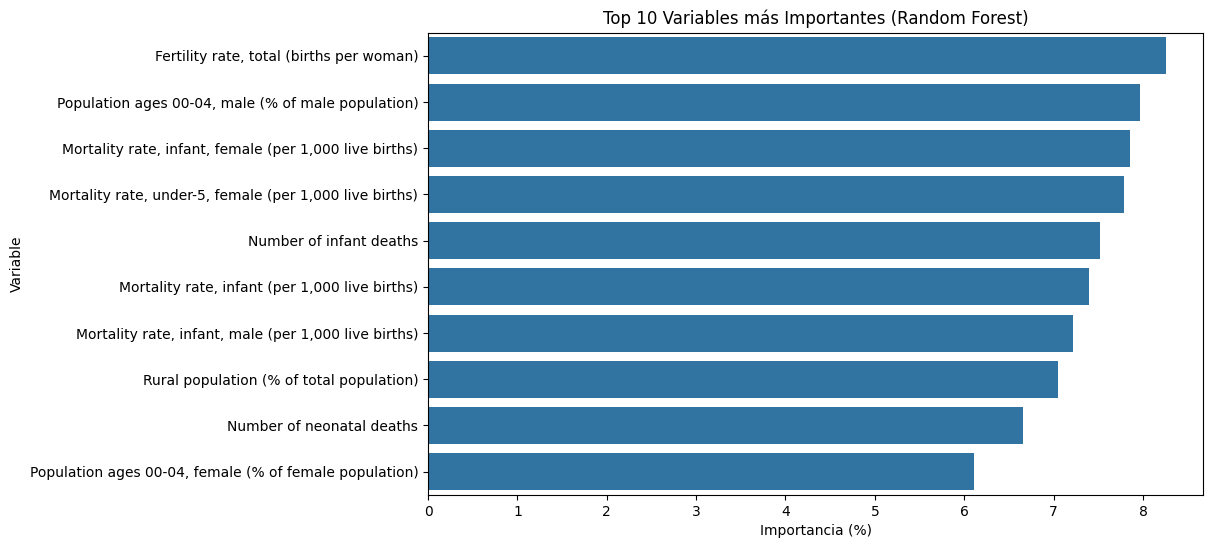

In [27]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes los datos X_train, X_test, y_train, y_test

# Entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Obtener la importancia de las características
feature_importance = rf_model.feature_importances_

# Crear un DataFrame para mostrar la importancia
rf_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia (%)': feature_importance * 100
})

# Mostrar el top 10 de la tabla ordenada por importancia
top_10_rf_importance_df = rf_importance_df.sort_values(by='Importancia (%)', ascending=False).head(10)
top_30_rf_importance_df = rf_importance_df.sort_values(by='Importancia (%)', ascending=False).head(30)

print(top_10_rf_importance_df)

# Visualizar el top 10 de la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia (%)', y='Variable', data=top_10_rf_importance_df)
plt.title('Top 10 Variables más Importantes (Random Forest)')
plt.xlabel('Importancia (%)')
plt.ylabel('Variable')
plt.show()


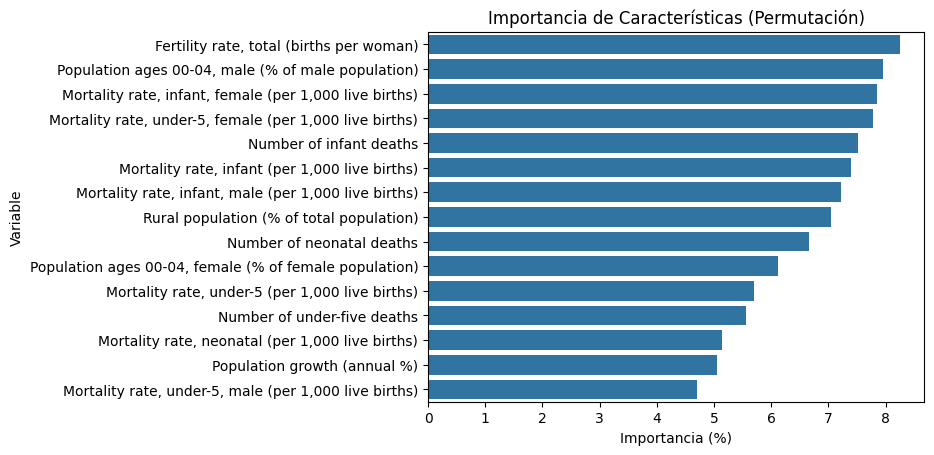

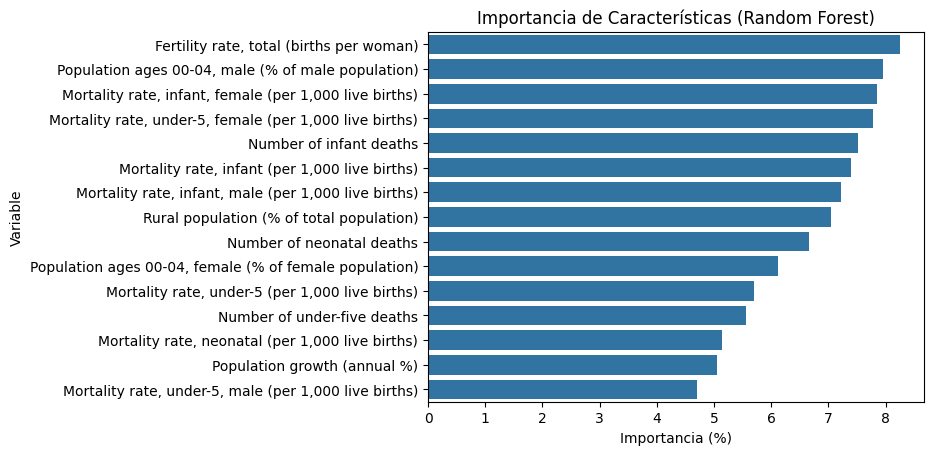

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización para la importancia de características (Permutación)
sns.barplot(x='Importancia (%)', y='Variable', data=top_30_rf_importance_df)
plt.title('Importancia de Características (Permutación)')
plt.show()

# Visualización para la importancia de características de Random Forest
sns.barplot(x='Importancia (%)', y='Variable', data=top_30_rf_importance_df)
plt.title('Importancia de Características (Random Forest)')
plt.show()


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que df es tu DataFrame
# Seleccionar la variable objetivo
target = 'Fertility rate, total (births per woman)'

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Obtener las correlaciones de todas las columnas con la variable objetivo
correlations_with_target = correlation_matrix[target].drop(target)

# Seleccionar las 10 columnas con mayor correlación absoluta con la variable objetivo
top_10_correlated_columns = correlations_with_target.abs().nlargest(10).index.tolist()

print("Top 10 columnas más correlacionadas con el objetivo:")
print(top_10_correlated_columns)


Top 10 columnas más correlacionadas con el objetivo:
['Number of infant deaths', 'Number of under-five deaths', 'Birth rate, crude (per 1,000 people)', 'PPP conversion factor, private consumption (LCU per international $)', 'Population ages 00-04, male (% of male population)', 'Population ages 00-04, female (% of female population)', 'Rural population', 'Population, female', 'Population density (people per sq. km of land area)', 'Population, total']


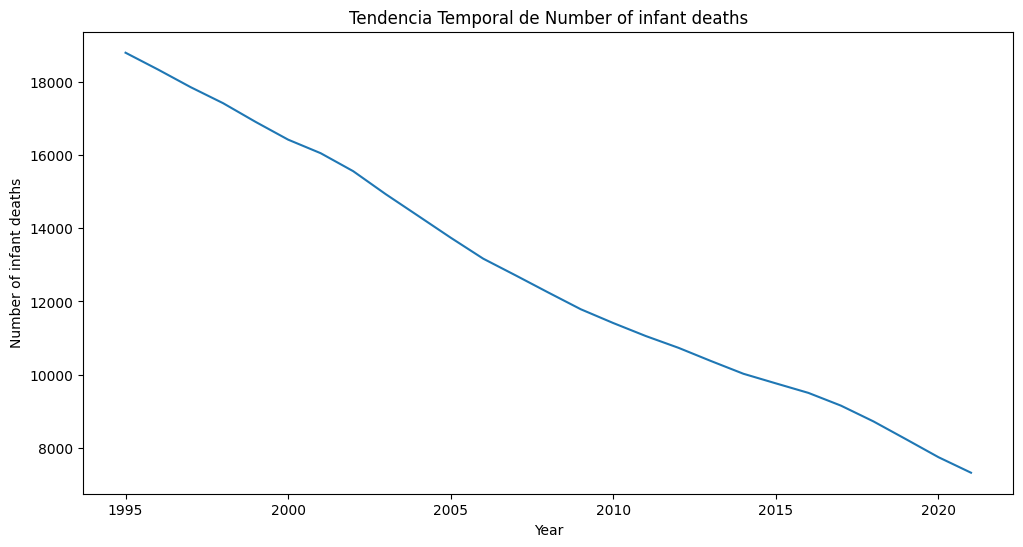

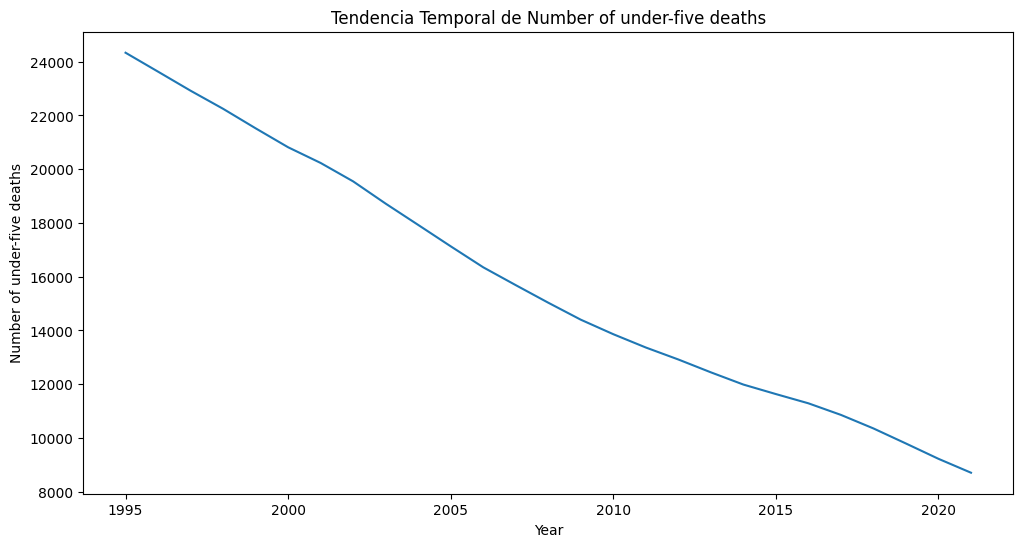

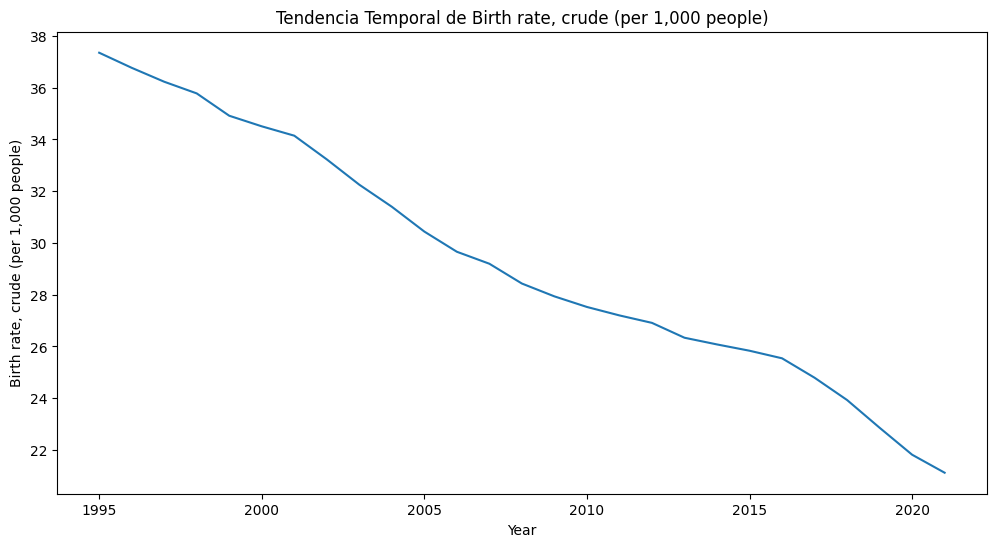

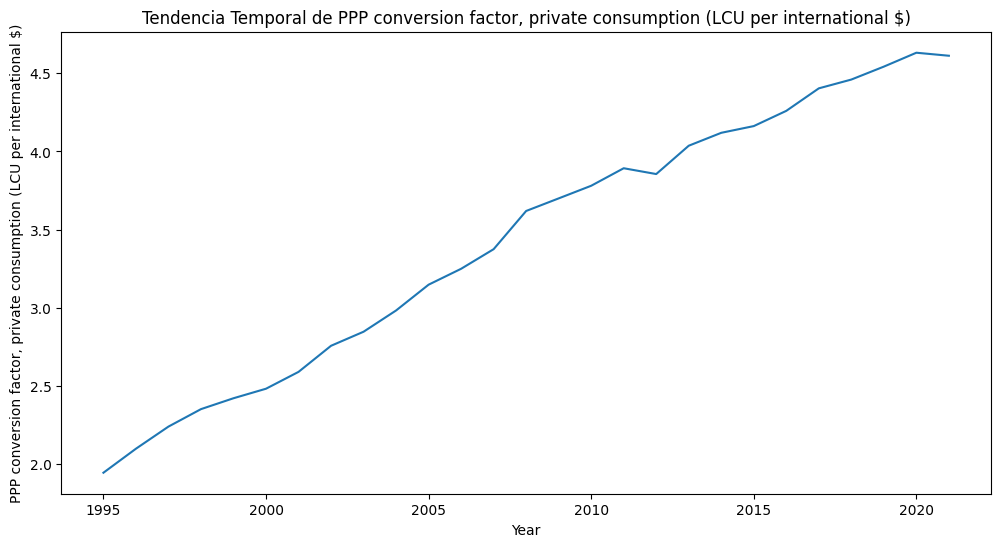

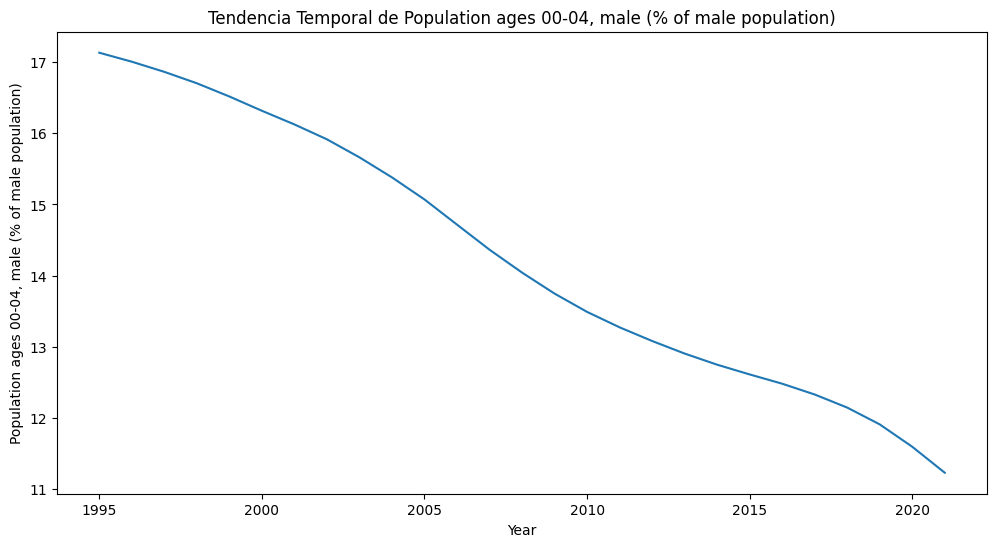

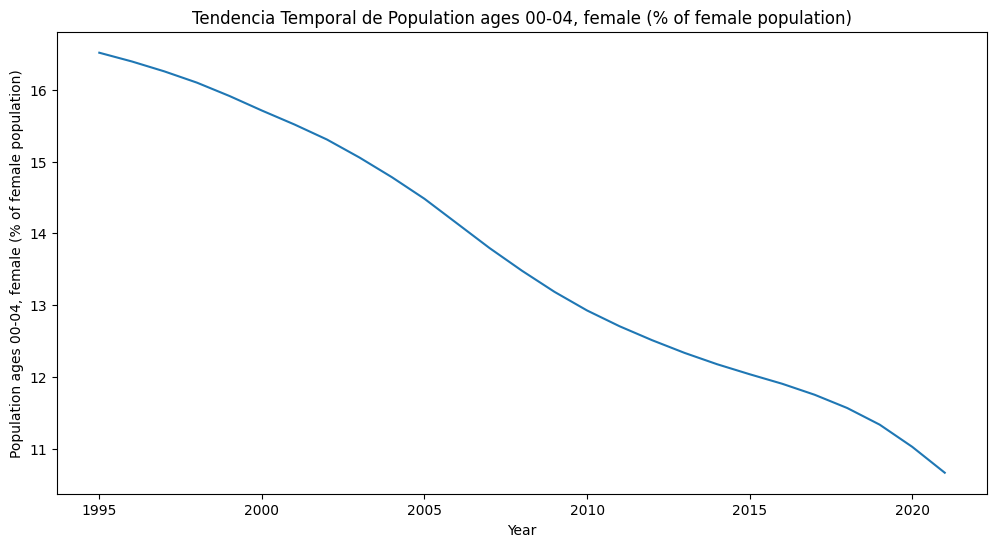

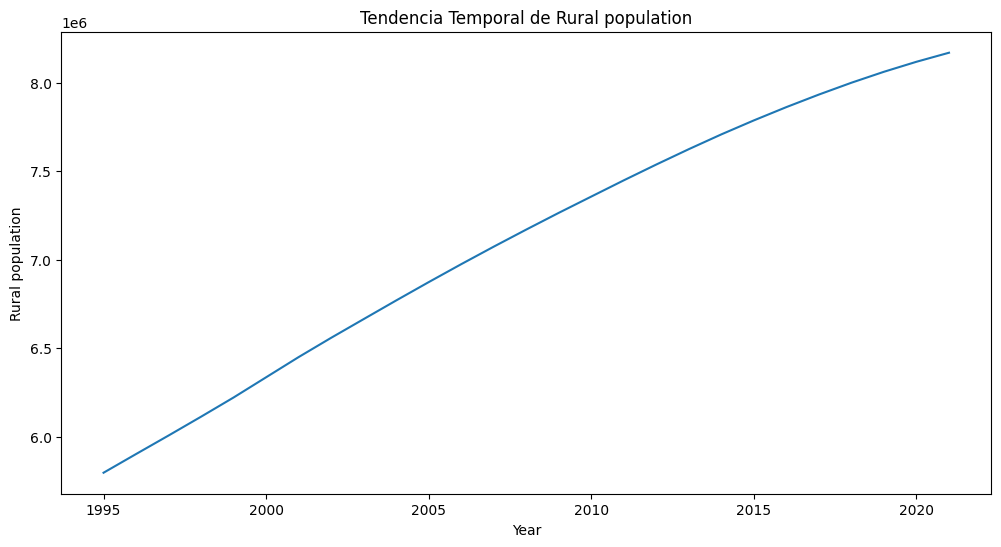

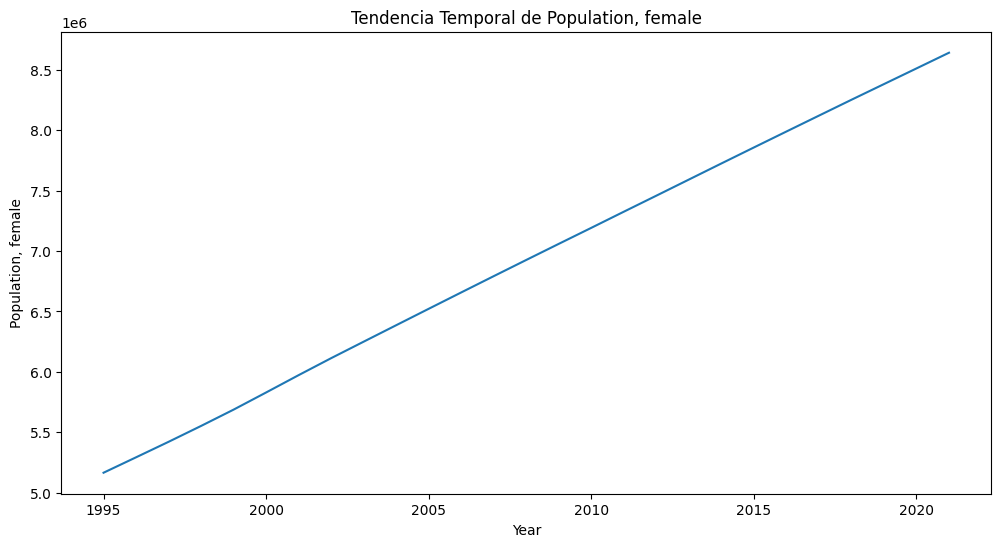

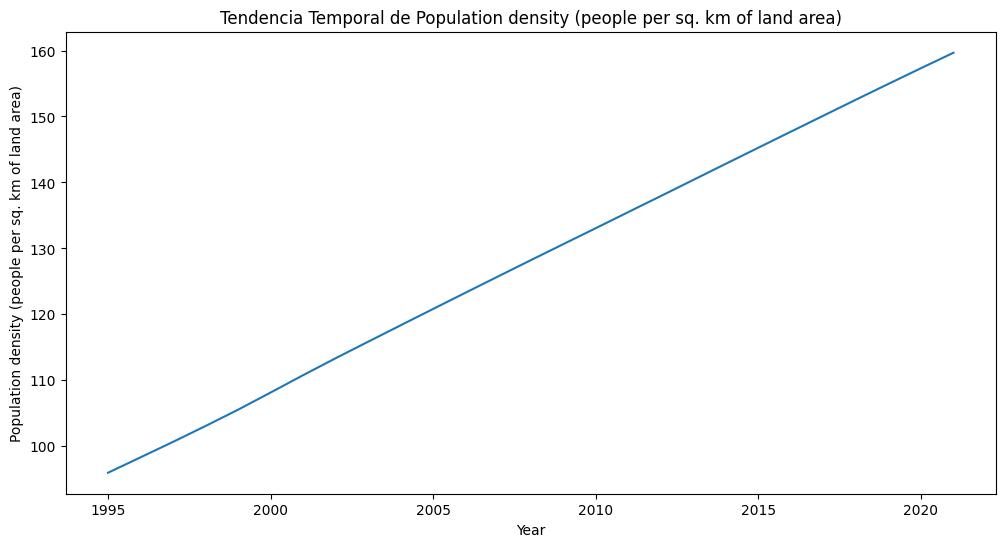

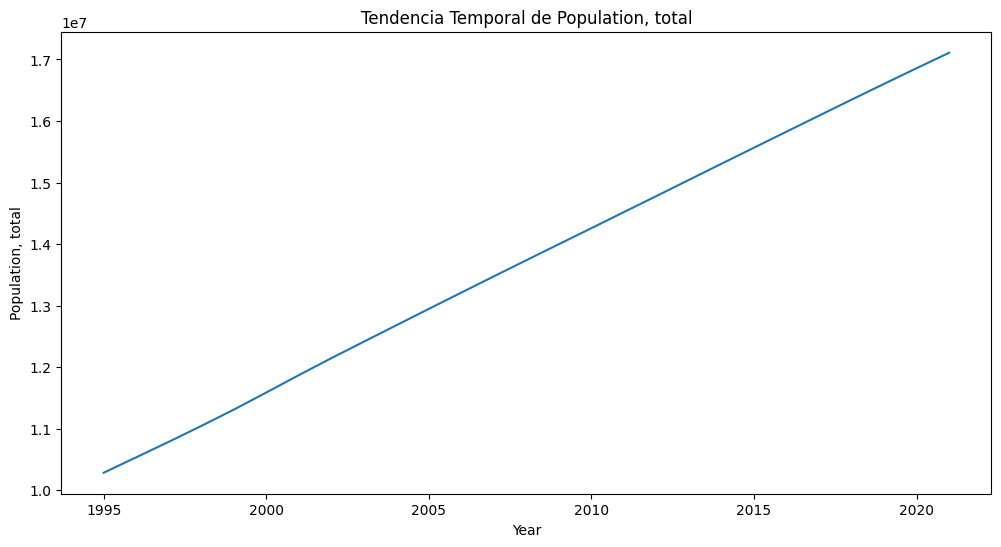

In [30]:
# Línea de tiempo para una variable específica
time_column = 'Year'  # Reemplaza 'Year' con tu columna de tiempo

for column in top_10_correlated_columns:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=df[time_column], y=df[column])
    plt.title(f'Tendencia Temporal de {column}')
    plt.xlabel(time_column)
    plt.ylabel(column)
    plt.show()


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Entrenamiento del modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
rf_predictions = rf_model.predict(X_test)

# Evaluación
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest Regression MAE: {rf_mae}")
print(f"Random Forest Regression MSE: {rf_mse}")
print(f"Random Forest Regression RMSE: {rf_rmse}")
print(f"Random Forest Regression R²: {rf_r2}")


Random Forest Regression MAE: 0.3910099999999734
Random Forest Regression MSE: 0.2034278290999691
Random Forest Regression RMSE: 0.45102974303250676
Random Forest Regression R²: 0.9935492555800195


In [ ]:
# Importancia de las características
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices[:10]]  # Top 10 características

# Gráfico de importancia de características
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), feature_importances[sorted_indices[:10]], align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las Características (Random Forest)')
plt.show()
